In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
kanser=pd.read_csv('breast-cancer.csv')

In [4]:
kanser.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [5]:
kanser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
y=kanser[['diagnosis']]
x=kanser.drop(columns=['diagnosis','id'],axis=1)

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=34)

In [8]:
tree=DecisionTreeClassifier()
model=tree.fit(x_train,y_train)

In [9]:
model.score(x_test,y_test)

0.9473684210526315

In [10]:
a=list(kanser.iloc[175])

In [11]:
b=a[2:]

In [12]:
model.predict([b])

c:\Users\METEHAN\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['B'], dtype=object)

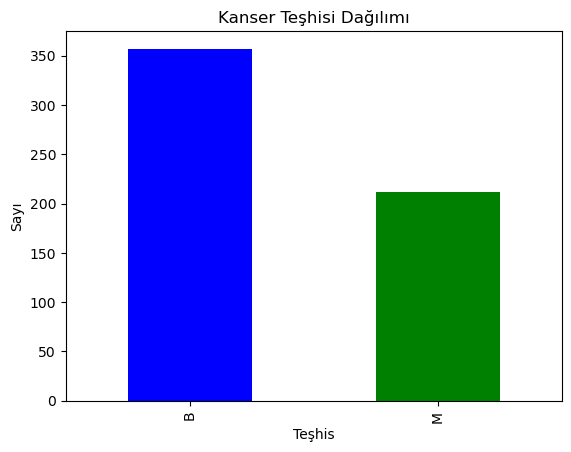

In [13]:

# Kanser teşhisi sınıfının dağılımını hesapla
diagnosis_distribution = kanser['diagnosis'].value_counts()

# Çubuk grafiği oluştur
diagnosis_distribution.plot(kind='bar', color=['blue', 'green'])
plt.title('Kanser Teşhisi Dağılımı')
plt.xlabel('Teşhis')
plt.ylabel('Sayı')
plt.show()

1'e yakın pozitif bir korelasyon, iki özellik arasında güçlü bir pozitif ilişki olduğunu gösterir.
-1'e yakın negatif bir korelasyon, iki özellik arasında güçlü bir negatif ilişki olduğunu gösterir.
0'a yakın bir korelasyon, iki özellik arasında belirgin bir ilişki olmadığını gösterir.

C:\Users\METEHAN\AppData\Local\Temp\ipykernel_6276\1615822571.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = kanser.drop('id', axis=1).corr()


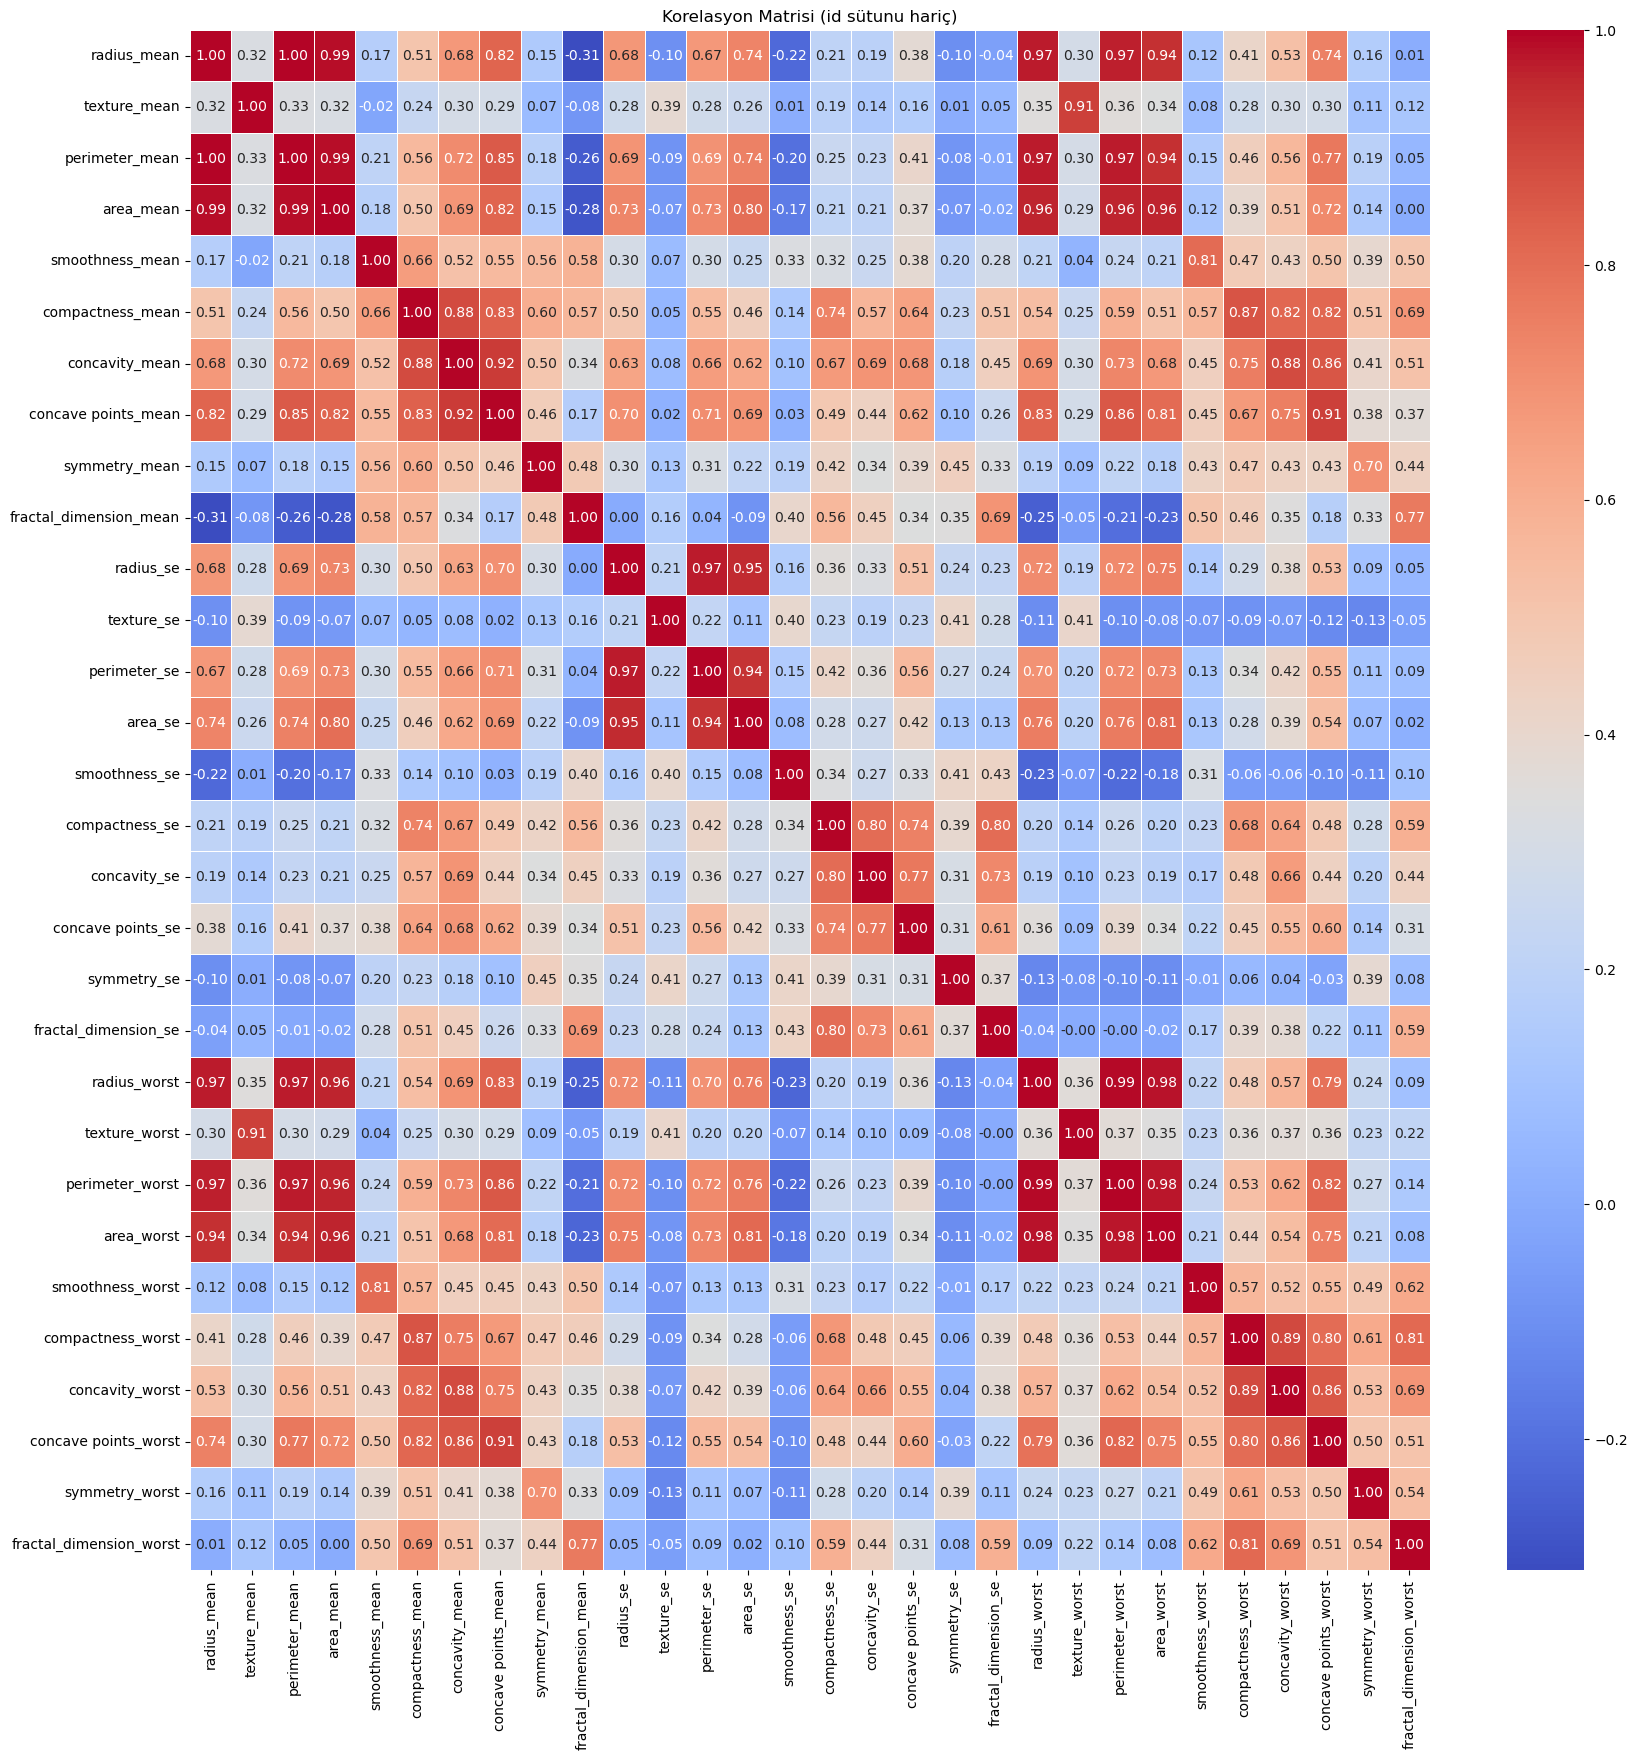

In [23]:
# 'id' sütununu korelasyon matrisinden çıkar
correlation_matrix = kanser.drop('id', axis=1).corr()

# Korelasyon matrisini görselleştirin
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Korelasyon Matrisi (id sütunu hariç)")
plt.show()

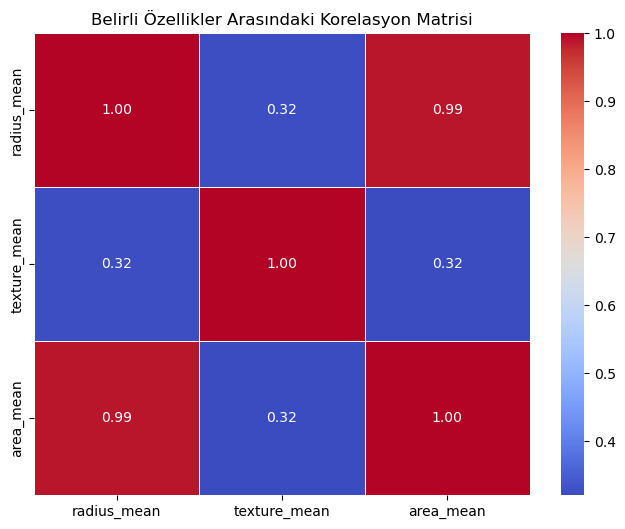

In [24]:
# Belirli özellikler arasındaki korelasyon matrisini oluşturun
selected_features = ['radius_mean', 'texture_mean', 'area_mean']
subset_correlation_matrix = kanser[selected_features].corr()

# Korelasyon matrisini görselleştirin
plt.figure(figsize=(8, 6))
sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Belirli Özellikler Arasındaki Korelasyon Matrisi")
plt.show()

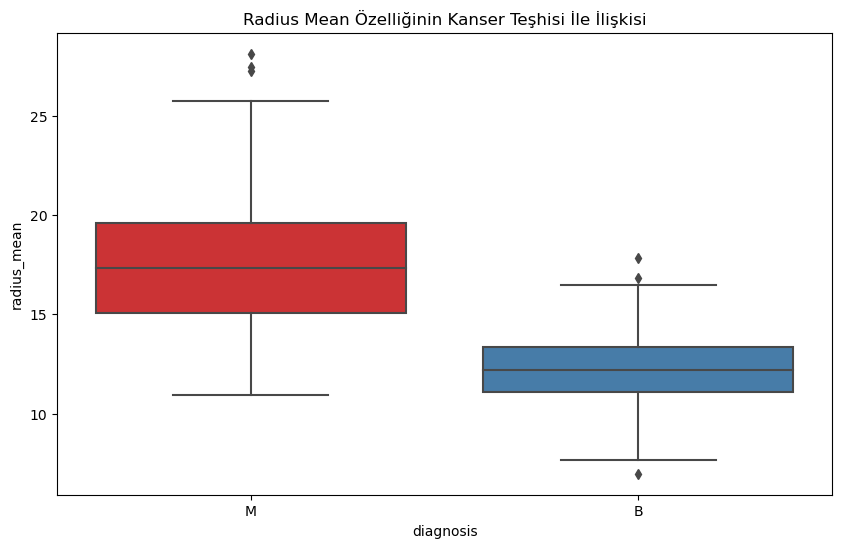

In [15]:
# Özellik dağılımını kutu grafikle göster
plt.figure(figsize=(10, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=kanser, palette='Set1')
plt.title('Radius Mean Özelliğinin Kanser Teşhisi İle İlişkisi')
plt.show()

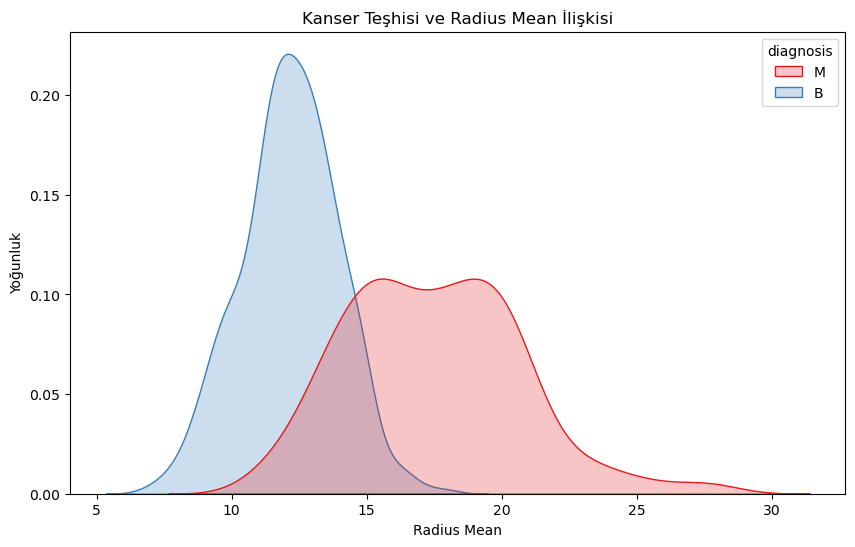

In [16]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=kanser, x='radius_mean', hue='diagnosis', common_norm=False, fill=True, palette='Set1')
plt.title('Kanser Teşhisi ve Radius Mean İlişkisi')
plt.xlabel('Radius Mean')
plt.ylabel('Yoğunluk')
plt.show()

<Figure size 1000x600 with 0 Axes>

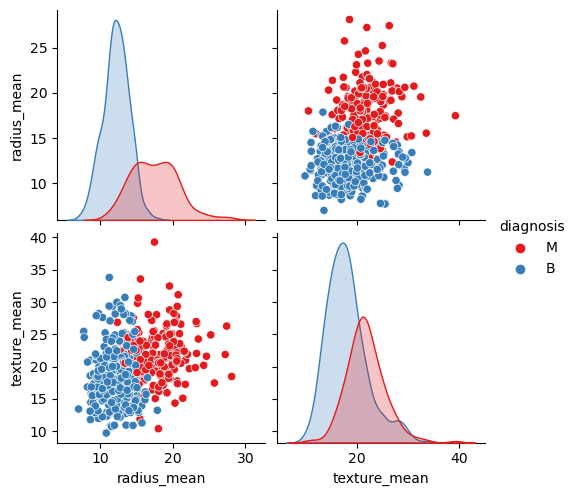

In [17]:
features = ['radius_mean', 'texture_mean']

plt.figure(figsize=(10, 6))
sns.pairplot(data=kanser, hue='diagnosis', vars=features, palette='Set1')
plt.show()

c:\Users\METEHAN\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


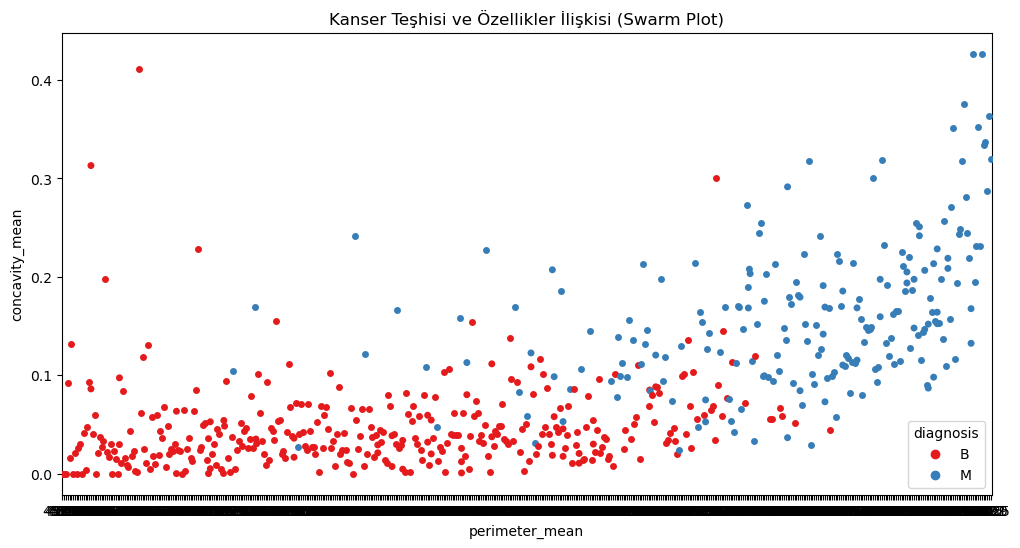

In [18]:
plt.figure(figsize=(12, 6))
sns.swarmplot(data=kanser, x='perimeter_mean', y='concavity_mean', hue='diagnosis', palette='Set1')
plt.title('Kanser Teşhisi ve Özellikler İlişkisi (Swarm Plot)')
plt.show()

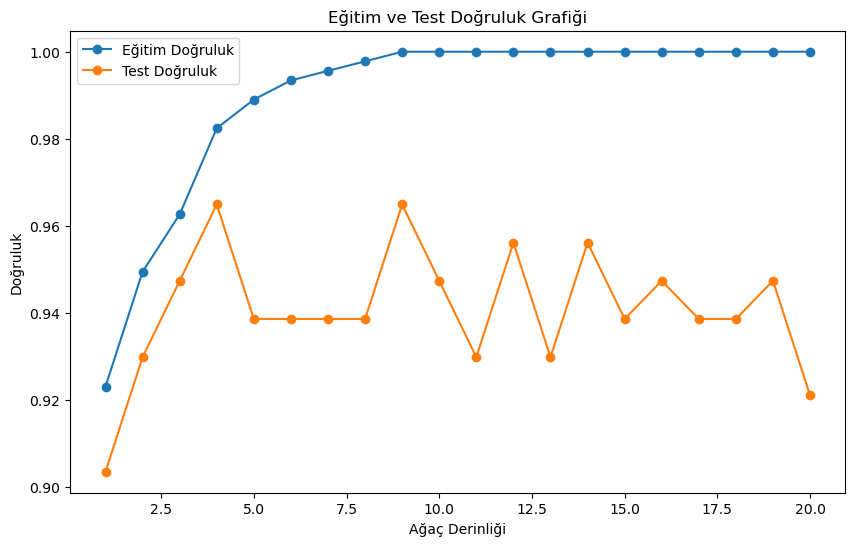

In [19]:
# Eğitim ve test doğruluk değerlerini toplayın
train_accuracy = []
test_accuracy = []

for i in range(1, 21):
    tree = DecisionTreeClassifier(max_depth=i)
    model = tree.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

# Eğitim ve test doğruluk grafiği
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_accuracy, label='Eğitim Doğruluk', marker='o')
plt.plot(range(1, 21), test_accuracy, label='Test Doğruluk', marker='o')
plt.title('Eğitim ve Test Doğruluk Grafiği')
plt.xlabel('Ağaç Derinliği')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# Test verileri üzerinde tahmin yapın
y_pred = model.predict(x_test)

# Karışıklık matrisini oluşturun
cm = confusion_matrix(y_test, y_pred)

# Sınıflandırma raporunu yazdırın
report = classification_report(y_test, y_pred)
print("Karışıklık Matrisi:\n", cm)
print("Sınıflandırma Raporu:\n", report)

Karışıklık Matrisi:
 [[71  5]
 [ 4 34]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           B       0.95      0.93      0.94        76
           M       0.87      0.89      0.88        38

    accuracy                           0.92       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



In [21]:
from sklearn.tree import export_graphviz
import graphviz

# Karar ağacının görselini oluşturun
dot_data = export_graphviz(model, out_file=None, 
                            feature_names=x_train.columns,  
                            class_names=['Kansersiz', 'Kanserli'],  
                            filled=True, rounded=True, special_characters=True)  

# Görseli görüntüleyin
graph = graphviz.Source(dot_data)  
graph.render("karar_agaci2")  # "karar_agaci" adında bir dosya oluşturur

'karar_agaci2.pdf'

True Positive (TP): 36
Kanserli hastaları doğru bir şekilde tanımladığınız sayı. Model, 36 kanserli vakayı doğru bir şekilde tespit etti.

True Negative (TN): 73
Kansersiz hastaları doğru bir şekilde tanımladığınız sayı. Model, 73 kansersiz vakayı doğru bir şekilde tespit etti.

False Positive (FP): 3
Kanser olmayan bir hastayı kanserli olarak yanlış bir şekilde tanımladığınız sayı. Model, 3 kansersiz hastayı yanlışlıkla kanserli olarak sınıflandırdı.

False Negative (FN): 2
Kanserli bir hastayı kanserli olmayan olarak yanlış bir şekilde tanımladığınız sayı. Model, 2 kanserli hastayı yanlışlıkla kansersiz olarak sınıflandırdı.

In [22]:
# True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN) değerlerini alın
tp = cm[1, 1]  # Kanserli doğru tahmin edilenler
tn = cm[0, 0]  # Kansersiz doğru tahmin edilenler
fp = cm[0, 1]  # Kansersiz olarak yanlış tahmin edilenler
fn = cm[1, 0]  # Kanserli olarak yanlış tahmin edilenler

print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)

True Positive (TP): 34
True Negative (TN): 71
False Positive (FP): 5
False Negative (FN): 4
